In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Install Kaggle and set up Kaggle API credentials in Colab
!pip install kaggle

# Create a directory for Kaggle credentials
!mkdir ~/.kaggle

# Upload your Kaggle API key JSON file (kaggle.json) here
from google.colab import files
files.upload()  # Upload the kaggle.json file




Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saqibkayani","key":"032ee2349270eb45db150334fd5202a5"}'}

In [3]:
# Move the kaggle.json file to the correct location
!mv kaggle.json ~/.kaggle/

# Change file permissions for security
!chmod 600 ~/.kaggle/kaggle.json



In [4]:
# Download the dataset from Kaggle
!kaggle datasets download -d colewelkins/cardiovascular-disease



Dataset URL: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease
License(s): DbCL-1.0
 70% 1.00M/1.43M [00:00<00:00, 1.06MB/s]
100% 1.43M/1.43M [00:01<00:00, 1.39MB/s]
unzip:  cannot find or open cardiovascular-disease-dataset.zip, cardiovascular-disease-dataset.zip.zip or cardiovascular-disease-dataset.zip.ZIP.


In [5]:
# Unzip the downloaded file
!unzip /content/cardiovascular-disease.zip

Archive:  /content/cardiovascular-disease.zip
  inflating: cardio_data_processed.csv  


In [6]:
# Load dataset

data = pd.read_csv("/content/cardio_data_processed.csv")


In [8]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])


In [10]:
# Define features and target
X = data.drop('cardio', axis=1)  # 'cardio' is the target column
y = data['cardio']

In [11]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [15]:
# Define the Dense model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the Dense model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
# Train the Dense model
history_dense = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7054 - loss: 0.5752 - val_accuracy: 0.7265 - val_loss: 0.5562
Epoch 2/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7272 - loss: 0.5485 - val_accuracy: 0.7276 - val_loss: 0.5536
Epoch 3/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7319 - loss: 0.5447 - val_accuracy: 0.7288 - val_loss: 0.5510
Epoch 4/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7317 - loss: 0.5457 - val_accuracy: 0.7278 - val_loss: 0.5518
Epoch 5/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7360 - loss: 0.5403 - val_accuracy: 0.7295 - val_loss: 0.5520
Epoch 6/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7357 - loss: 0.5382 - val_accuracy: 0.7293 - val_loss: 0.5518
Epoch 7/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7366 - loss: 0.5366 - val_accuracy: 0.7278 - val_loss: 0.5508
Epoch 8/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7381 - loss: 0.5370 -

In [18]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 2, activation='relu', input_shape=X_train_cnn.shape[1:]))  # Convolutional layer
model_cnn.add(Flatten())  # Flatten layer
model_cnn.add(Dense(32, activation='relu'))  # Dense layer
model_cnn.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the CNN model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7168 - loss: 0.5650 - val_accuracy: 0.7285 - val_loss: 0.5550
Epoch 2/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7323 - loss: 0.5445 - val_accuracy: 0.7296 - val_loss: 0.5503
Epoch 3/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7304 - loss: 0.5439 - val_accuracy: 0.7324 - val_loss: 0.5490
Epoch 4/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7350 - loss: 0.5407 - val_accuracy: 0.7321 - val_loss: 0.5485
Epoch 5/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7353 - loss: 0.5423 - val_accuracy: 0.7322 - val_loss: 0.5484
Epoch 6/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7350 - loss: 0.5408 - val_accuracy: 0.7320 - val_loss: 0.5490
Epoch 7/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7360 - loss: 0.5418 - val_accuracy: 0.7321 - val_loss: 0.5522
Epoch 8/10
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7323 - loss: 0.5435 - 

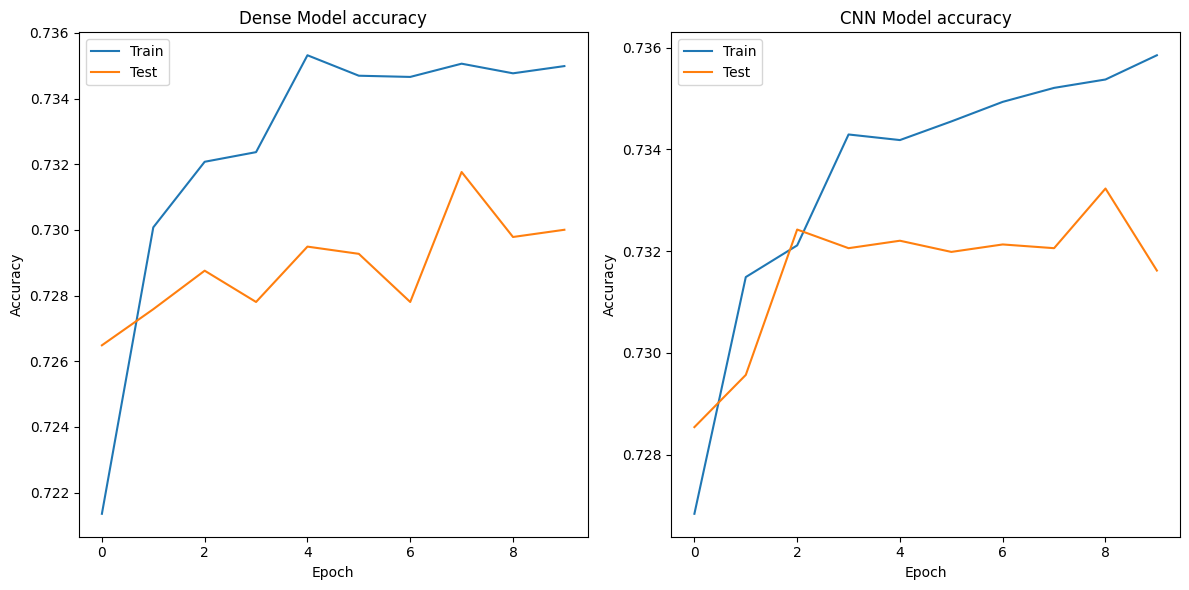

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('Dense Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



Evaluation Metrics for Dense Model:
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6962
           1       0.74      0.69      0.71      6679

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



<Axes: >

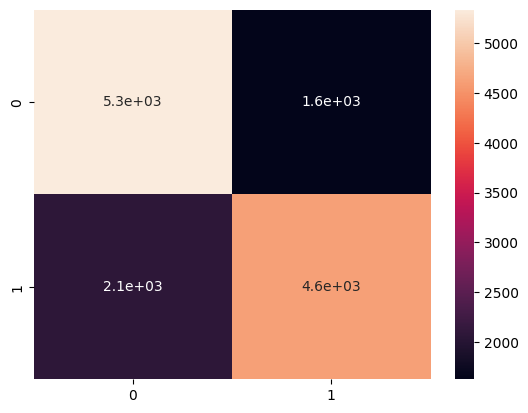

In [20]:
# Evaluate Dense Model
print("\nEvaluation Metrics for Dense Model:")
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)



Evaluation Metrics for CNN Model:
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6962
           1       0.74      0.69      0.72      6679

    accuracy                           0.73     13641
   macro avg       0.73      0.73      0.73     13641
weighted avg       0.73      0.73      0.73     13641



<Axes: >

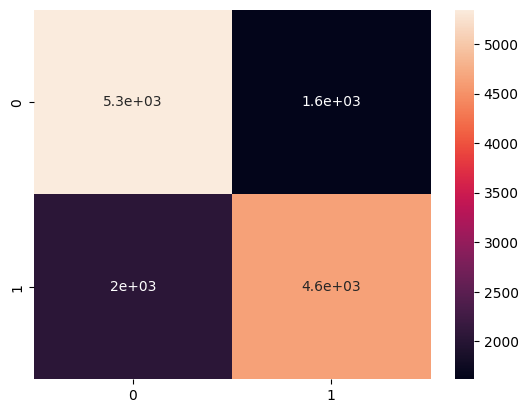

In [21]:
# Evaluate CNN Model
print("\nEvaluation Metrics for CNN Model:")
predictions_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")
print(classification_report(y_test, predictions_cnn))
cm_cnn = confusion_matrix(y_test, predictions_cnn)
sns.heatmap(cm_cnn, annot=True)


**Figures**

427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
427/427 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


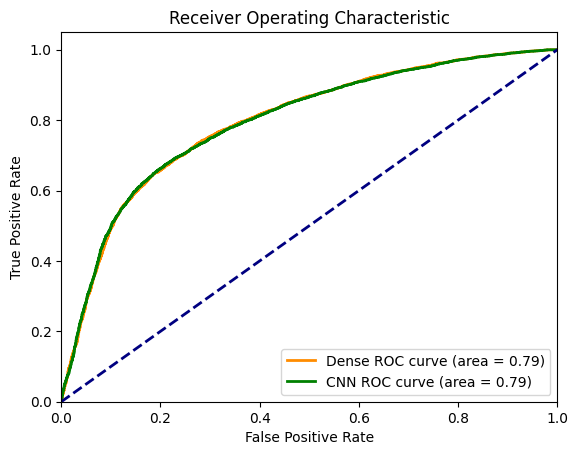

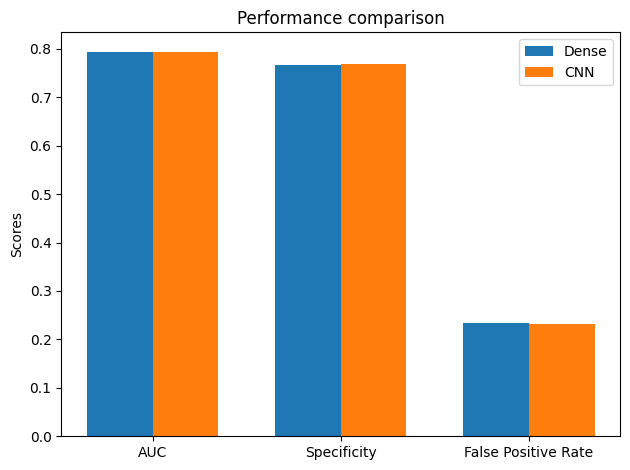

In [22]:
# Import additional libraries
from sklearn.metrics import roc_curve, auc
import numpy as np

# Dense Model predictions as probabilities
pred_prob_dense = model.predict(X_test)

# CNN Model predictions as probabilities
pred_prob_cnn = model_cnn.predict(X_test_cnn)

# Calculate ROC curves and AUC scores
fpr_dense, tpr_dense, _ = roc_curve(y_test, pred_prob_dense)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, pred_prob_cnn)
roc_auc_dense = auc(fpr_dense, tpr_dense)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC Curves
plt.figure()
lw = 2
plt.plot(fpr_dense, tpr_dense, color='darkorange', lw=lw, label='Dense ROC curve (area = %0.2f)' % roc_auc_dense)
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Specificity and False Positive rate
tn_dense, fp_dense, fn_dense, tp_dense = confusion_matrix(y_test, predictions).ravel()
specificity_dense = tn_dense / (tn_dense + fp_dense)
fpr_dense = 1 - specificity_dense

tn_cnn, fp_cnn, fn_cnn, tp_cnn = confusion_matrix(y_test, predictions_cnn).ravel()
specificity_cnn = tn_cnn / (tn_cnn + fp_cnn)
fpr_cnn = 1 - specificity_cnn

# Performance comparison
labels = ['AUC', 'Specificity', 'False Positive Rate']
dense_metrics = [roc_auc_dense, specificity_dense, fpr_dense]
cnn_metrics = [roc_auc_cnn, specificity_cnn, fpr_cnn]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dense_metrics, width, label='Dense')
rects2 = ax.bar(x + width/2, cnn_metrics, width, label='CNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
